In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [68]:
ad_df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
ad_df=pd.DataFrame(data=ad_df)
ad_df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [69]:
ad_df=ad_df.drop("Unnamed: 0",axis=1)

In [70]:
ad_df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### EDA

In [71]:
ad_df.shape

(200, 4)

In [72]:
ad_df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

TV              AxesSubplot(0.125,0.125;0.168478x0.755)
radio        AxesSubplot(0.327174,0.125;0.168478x0.755)
newspaper    AxesSubplot(0.529348,0.125;0.168478x0.755)
sales        AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

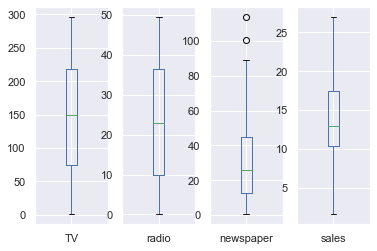

In [73]:
#checking for outliers

ad_df.plot(kind="box",subplots=True)
#we can see some outliers in the newspaper column

#now i will check for the corelation between the target "sales" and independent feartures "newspaper","tv","radio"

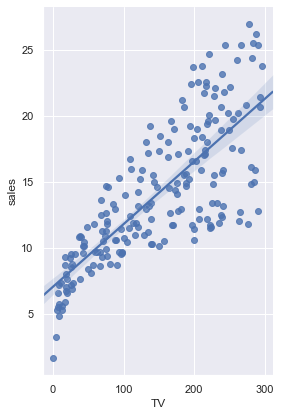

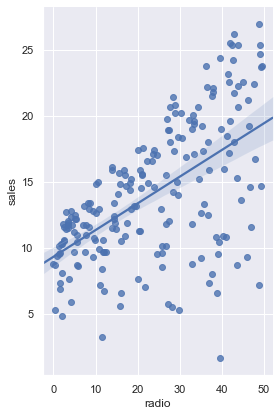

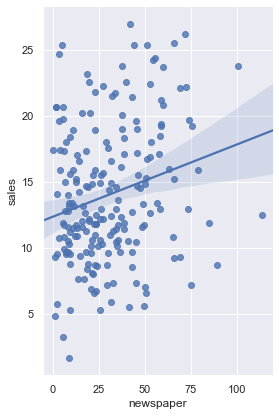

In [74]:
sns.set(style="darkgrid")
independent=ad_df.iloc[:,:-1]
independent.columns
for i in independent:
    sns.pairplot(ad_df, x_vars=i, y_vars='sales', size=6, aspect=0.7, kind='reg')
    
#there is strong linear relationship between sales and tv
#there is weak linear relationship between sales and newspaper and radio. newspaper being the weakest of them all.

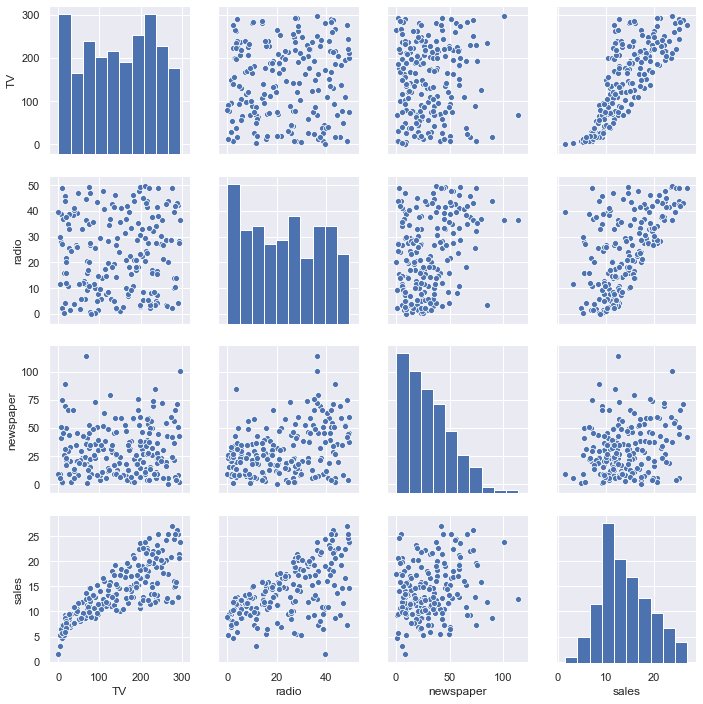

In [75]:
sns.pairplot(data=ad_df)
#here in we can see that the independent varibales for ex tv have no or very very weak correlation between them and having strong 
# correlation with the target varibale "sales". 
#this is how it is suppoesed to be. independent varibales ideally should have no correlation between but in real life,
# it does not exists.

In [76]:
#hadling the outliers

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(ad_df))
print(z)

# Looking the code and the output above,
# it is difficult to say which data point is an outlier. 
# Let’s try and define a threshold to identify an outlier.

[[9.69852266e-01 9.81522472e-01 1.77894547e+00 1.55205313e+00]
 [1.19737623e+00 1.08280781e+00 6.69578760e-01 6.96046111e-01]
 [1.51615499e+00 1.52846331e+00 1.78354865e+00 9.07405869e-01]
 [5.20496822e-02 1.21785493e+00 1.28640506e+00 8.60330287e-01]
 [3.94182198e-01 8.41613655e-01 1.28180188e+00 2.15683025e-01]
 [1.61540845e+00 1.73103399e+00 2.04592999e+00 1.31091086e+00]
 [1.04557682e+00 6.43904671e-01 3.24708413e-01 4.27042783e-01]
 [3.13436589e-01 2.47406325e-01 8.72486994e-01 1.58039455e-01]
 [1.61657614e+00 1.42906863e+00 1.36042422e+00 1.77205942e+00]
 [6.16042873e-01 1.39530685e+00 4.30581584e-01 6.57617064e-01]
 [9.45155670e-01 1.17923146e+00 2.92486143e-01 1.04190753e+00]
 [7.90028350e-01 4.96973404e-02 1.22232878e+00 6.48970529e-01]
 [1.43908760e+00 7.99208859e-01 1.62704048e+00 9.26620392e-01]
 [5.78501712e-01 1.05768905e+00 1.07502697e+00 8.30547775e-01]
 [6.66253447e-01 6.50657027e-01 7.11007392e-01 9.56402904e-01]
 [5.64664612e-01 1.65000572e+00 1.02862691e+00 1.609696

In [77]:
threshold=3
print(np.where(z>3))

print(z[16][2])
# The first array contains the list of row numbers 
# and second array respective column numbers, which mean z[16][2] have a Z-score higher than 3.

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))
3.8411707150992718


In [78]:
#removing outliers
print("the shape of the dataframe before removing outliers",ad_df.shape)
ad_df = ad_df[(z < 3).all(axis=1)]
print("the shape of the dataframe after removing outliers",ad_df.shape)

the shape of the dataframe before removing outliers (200, 4)
the shape of the dataframe after removing outliers (198, 4)


### Train test split

In [113]:
print("The following is the independent data :")
x=ad_df.iloc[:,:-1]
print(x.columns)
print("\n")
print("The following is the target data :")
y=ad_df.iloc[:,-1]
print(y.head())

The following is the independent data :
Index(['TV', 'radio', 'newspaper'], dtype='object')


The following is the target data :
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
count=0
random=range(101)
for numbers in random:
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.30,random_state=numbers)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    score=lr.score(x_train,y_train)
    pred_y=lr.predict(x_test)
    print("the score for random state",numbers,"is",score)
    
    if score>count:
        count = score
        final_number = numbers
print("\n")
print("the max score for random state",final_number,"is",count)

the score for random state 0 is 0.88586994520838
the score for random state 1 is 0.8860896909195272
the score for random state 2 is 0.9137739454384091
the score for random state 3 is 0.9023834789281908
the score for random state 4 is 0.9002938768700731
the score for random state 5 is 0.895935137523506
the score for random state 6 is 0.9017449009440633
the score for random state 7 is 0.8922274801107601
the score for random state 8 is 0.9029760471576862
the score for random state 9 is 0.8800010792264745
the score for random state 10 is 0.923708293910713
the score for random state 11 is 0.8950874455865587
the score for random state 12 is 0.8971696717544586
the score for random state 13 is 0.9035289237815526
the score for random state 14 is 0.8856824704697593
the score for random state 15 is 0.8986656113459681
the score for random state 16 is 0.8971961231180285
the score for random state 17 is 0.8859123187756281
the score for random state 18 is 0.914236109686272
the score for random state 

In [116]:
print(lr.coef_)
print(lr.intercept_)

[ 0.0437745   0.20858908 -0.01005556]
3.0521068380748684


In [117]:
from sklearn import metrics

print(metrics.mean_absolute_error(y_test,pred_y))
print(metrics.mean_squared_error(y_test,pred_y))
print(np.sqrt(metrics.mean_squared_error(y_test,pred_y)))
print(lr.score(x_test,y_test))

1.3506793203564833
4.054511594326675
2.0135817823785245
0.860528262533749


In [105]:
#Now as we know that the newspaper column was behaving negatively with our model so let us drop the newspaper columns and see 
# where it goes!

newdf=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
newdf=pd.DataFrame(data=newdf)
newdf.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [106]:
newdf=newdf.drop("Unnamed: 0",axis=1)
newdf=newdf.drop("newspaper",axis=1)

In [107]:
newdf.columns

Index(['TV', 'radio', 'sales'], dtype='object')

In [112]:
x1=newdf.iloc[:,:-1]
x1.columns

Index(['TV', 'radio'], dtype='object')

In [111]:
y1=newdf["sales"]
y1.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [119]:
count1=0
random=range(101)
for numbers in random:
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1,test_size=.30,random_state=numbers)
    lr1=LinearRegression()
    lr1.fit(x1_train,y1_train)
    score1=lr1.score(x1_train,y1_train)
    pred_y1=lr1.predict(x1_test)
    print("the score for random state",numbers,"is",score1)
    
    if score1>count1:
        count1 = score1
        final_number1 = numbers
print("\n")
print("the max score for random state",final_number1,"is",count1)

the score for random state 0 is 0.9065235649327258
the score for random state 1 is 0.8849581188519494
the score for random state 2 is 0.9288470229669651
the score for random state 3 is 0.9041157116176516
the score for random state 4 is 0.8885667125777709
the score for random state 5 is 0.8997316645428147
the score for random state 6 is 0.9070849753890726
the score for random state 7 is 0.8970470374578727
the score for random state 8 is 0.8978117806727234
the score for random state 9 is 0.8933409037913345
the score for random state 10 is 0.920757474926786
the score for random state 11 is 0.8982284844619375
the score for random state 12 is 0.8879282346421975
the score for random state 13 is 0.8761514170304615
the score for random state 14 is 0.9075370198780632
the score for random state 15 is 0.8904173371595485
the score for random state 16 is 0.897922045241337
the score for random state 17 is 0.9159418490687375
the score for random state 18 is 0.9058282051217117
the score for random sta

## FINALISING THE MODEL

In [126]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1,test_size=.30,random_state=2)
lr1=LinearRegression()
lr1.fit(x1_train,y1_train)
print(lr1.score(x1_train,y1_train))
pred_y1=lr1.predict(x1_test)
print(pred_y1)
print(y1_test)

0.9288470229669651
[14.11270167  9.42934607  6.88374366 15.43797745 18.58479087 15.46098943
  7.35359978 20.53792304 13.11886651 17.28537239 10.79752184 19.34747162
  9.11577662 10.76465316 14.04198744 12.47705099  9.13300785 17.75862228
 16.6124018  18.61717473 16.78675003 15.90744394 11.91272471 12.03682674
 14.59384249 12.25768189 15.38735928  8.12770455 16.53485962 13.93157658
 16.31677224 17.10329716 12.86454315 13.00804838  9.00474348 10.9054222
 22.30849515 20.1424675  15.90231196 20.07560539 21.0579478  17.48069114
 21.26728558 15.23469022 19.85655718 18.60131159 17.47289354 10.56920579
  9.74043149 12.63953449 12.65610629 14.20703252 17.46850551 17.25406221
  8.42729722 17.04876696  9.22317636  4.05262939  7.85521746 24.87156145]
112    14.1
29     10.5
182     8.7
199    13.4
193    19.6
85     15.2
10      8.6
54     20.2
115    12.6
35     12.8
12      9.2
92     19.4
13      9.7
126     6.6
174    11.5
2       9.3
44      8.5
3      18.5
113    15.9
14     19.0
23     15.5

In [121]:
print(metrics.mean_absolute_error(y1_test,pred_y1))
print(metrics.mean_squared_error(y1_test,pred_y1))
print(np.sqrt(metrics.mean_squared_error(y1_test,pred_y1)))
print(lr1.score(x1_test,y1_test)) # another way of showing the r2 score

#The RMSE decreased when we removed Newspaper from the model. 
# (Error is something we want to minimize, so a lower number for RMSE is better.) 
# Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

1.0397500099187902
1.784740052090281
1.3359416349864544
0.9092164491718219


In [123]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_y)) #this is the old r2 score with the newspaper column
print(r2_score(y1_test,pred_y1)) # this the new r2 score with no newspaper column

#hence our r2 score has also improved even after removing an independent varibale which means that
# the removed columns "newspaper" was not getting properly fit in our linear model

0.8605282625337491
0.909216449171822


## SAVING THE MODEL

In [128]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.externals import joblib
joblib.dump(lr1,"lr1_EVALPROJECT_6")

['lr1_EVALPROJECT_6']